### 실습과제) 네이버 블로그 데이터 수집하기

In [1]:
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from tqdm import tqdm

import time
import re

def preprocess_sentence_kr(w):
  w = w.strip()
  w = re.sub(r"[^0-9가-힣?.!,¿]+", " ", w)
  w = w.strip()
  return w

In [2]:
# 1.네이버 메인 페이지 요청 후 "음식물 처리기" 검색되도록 구현해보기
driver = wb.Chrome()

In [3]:
url = 'https://www.naver.com'
driver.get(url)

In [4]:
keyword = '음식물 처리기 사용 후기'
search_input = driver.find_element(By.ID, 'query')
search_input.send_keys(keyword+'\n')

In [5]:
# 2."블로그" 탭 클릭
driver.find_element(By.LINK_TEXT, '블로그').click()

In [6]:
# 기간설정하는 방법
option_btn = driver.find_element(By.CSS_SELECTOR,'.btn_option._search_option_open_btn')
option_btn.click()

In [7]:
# 기간값을 가진 요소 추출
options = driver.find_elements(By.CSS_SELECTOR, 'li.term a.txt')

options[6].click()

In [8]:
# 1. 네이버 블로그 URL 패턴 분석을 통해 기간설정값 찾아보기
# 2. 검색할 키워드와 기간설정값을 변수로 만든 후 URL변수에 적용하기
# -  ex) url = f'https://~~~/query={검색할 키워드 변수}&term={기간설정변수}'
# 3. selenium 으로 브라우저 띄우기
keyword = '음식물%20처리기%20사용후기'
term = 'so%3Ar%2Cp%3A6m' # 기간패턴: 0(전체), 1(1시간), 2(1일), 3,
url2 = f'https://search.naver.com/search.naver?ssc=tab.blog.all&query={keyword}&sm=tab_opt&nso={term}'

print(url2)

https://search.naver.com/search.naver?ssc=tab.blog.all&query=음식물%20처리기%20사용후기&sm=tab_opt&nso=so%3Ar%2Cp%3A6m


In [9]:
# 3. 스크롤 내리기
for i in range(3):
    body = driver.find_element(By.TAG_NAME, 'body')
    body.send_keys(Keys.END)
    time.sleep(1)

In [10]:
# 5. 조회된 블로그 게시글 URL 수집하여 리스트에 저장
aTags = driver.find_elements(By.CSS_SELECTOR, 'a.title_link')
len(aTags)


120

In [11]:

href_list = []

for a in aTags:
    href = a.get_attribute('href')

    # tistory, 이외 url 주소가 저장되지 않도록 조건 설정
    if 'blog' in href:
        print(href)
        href_list.append(href)
    

href_list

https://blog.naver.com/maylily_baby/223706808349
https://blog.naver.com/lje1049/223679643524
https://blog.naver.com/270design/223677277206
https://blog.naver.com/0228jay/223566428518
https://blog.naver.com/tinker_bell4/223674096057
https://blog.naver.com/bebeto23/223712439895
https://blog.naver.com/besisi1004/223590373932
https://blog.naver.com/cheawhi/223660694759
https://blog.naver.com/7112307/223666663414
https://blog.naver.com/re14333/223677281816
https://blog.naver.com/sosin279/223703912417
https://blog.naver.com/lalahonghong/223628605257
https://blog.naver.com/kkwrkdrk2/223693660666
https://blog.naver.com/iclimb/223648184400
https://blog.naver.com/reinadetrain/223660684989
https://blog.naver.com/mybombom/223708661288
https://blog.naver.com/kut_da_92/223558532889
https://blog.naver.com/coconeldeco/223698245564
https://blog.naver.com/vitaminlala/223709633541
https://blog.naver.com/kimhjz1/223702997310
https://blog.naver.com/fevernova22/223649736167
https://blog.naver.com/besisi1004

['https://blog.naver.com/maylily_baby/223706808349',
 'https://blog.naver.com/lje1049/223679643524',
 'https://blog.naver.com/270design/223677277206',
 'https://blog.naver.com/0228jay/223566428518',
 'https://blog.naver.com/tinker_bell4/223674096057',
 'https://blog.naver.com/bebeto23/223712439895',
 'https://blog.naver.com/besisi1004/223590373932',
 'https://blog.naver.com/cheawhi/223660694759',
 'https://blog.naver.com/7112307/223666663414',
 'https://blog.naver.com/re14333/223677281816',
 'https://blog.naver.com/sosin279/223703912417',
 'https://blog.naver.com/lalahonghong/223628605257',
 'https://blog.naver.com/kkwrkdrk2/223693660666',
 'https://blog.naver.com/iclimb/223648184400',
 'https://blog.naver.com/reinadetrain/223660684989',
 'https://blog.naver.com/mybombom/223708661288',
 'https://blog.naver.com/kut_da_92/223558532889',
 'https://blog.naver.com/coconeldeco/223698245564',
 'https://blog.naver.com/vitaminlala/223709633541',
 'https://blog.naver.com/kimhjz1/223702997310',
 

In [12]:
len(href_list)

120

### 코드 통합

In [13]:
#6. 리스트&반복문을 활용하여 페이지 요청
# -  블로그 게시글 수집(반복수행)
# -  텍스트 파일에 저장(반복수행)

f = open('네이버 블로그 게시글 데이터.txt', 'w')

for i in tqdm(range(120)):
    driver.get(href_list[i])

    driver.implicitly_wait(2)

    driver.switch_to.frame('mainFrame')

    print('접속한 url:', href_list[i])

    try:
        blog_content = driver.find_element(By.CLASS_NAME, 'se-main-container')
    except:
        blog_content = driver.find_element(By.CLASS_NAME, '.se-component-wrap.sect-dsc')
    
    content = preprocess_sentence_kr(blog_content.text)
    
    f.write(content + '\n\n')
f.close()

  0%|          | 0/120 [00:00<?, ?it/s]

접속한 url: https://blog.naver.com/maylily_baby/223706808349


  1%|          | 1/120 [00:01<02:02,  1.03s/it]

접속한 url: https://blog.naver.com/lje1049/223679643524


  2%|▎         | 3/120 [00:03<02:03,  1.06s/it]

접속한 url: https://blog.naver.com/270design/223677277206


  3%|▎         | 4/120 [00:04<02:05,  1.08s/it]

접속한 url: https://blog.naver.com/0228jay/223566428518


  4%|▍         | 5/120 [00:05<01:51,  1.03it/s]

접속한 url: https://blog.naver.com/tinker_bell4/223674096057
접속한 url: https://blog.naver.com/bebeto23/223712439895


  6%|▌         | 7/120 [00:07<02:08,  1.14s/it]

접속한 url: https://blog.naver.com/besisi1004/223590373932
접속한 url: https://blog.naver.com/cheawhi/223660694759


  8%|▊         | 9/120 [00:10<02:20,  1.26s/it]

접속한 url: https://blog.naver.com/7112307/223666663414


  8%|▊         | 10/120 [00:11<02:09,  1.17s/it]

접속한 url: https://blog.naver.com/re14333/223677281816


  9%|▉         | 11/120 [00:12<02:03,  1.13s/it]

접속한 url: https://blog.naver.com/sosin279/223703912417
접속한 url: https://blog.naver.com/lalahonghong/223628605257


 11%|█         | 13/120 [00:15<02:29,  1.39s/it]

접속한 url: https://blog.naver.com/kkwrkdrk2/223693660666


 12%|█▏        | 14/120 [00:17<02:28,  1.40s/it]

접속한 url: https://blog.naver.com/iclimb/223648184400


 12%|█▎        | 15/120 [00:18<02:07,  1.21s/it]

접속한 url: https://blog.naver.com/reinadetrain/223660684989
접속한 url: https://blog.naver.com/mybombom/223708661288


 14%|█▍        | 17/120 [00:20<02:16,  1.33s/it]

접속한 url: https://blog.naver.com/kut_da_92/223558532889


 15%|█▌        | 18/120 [00:22<02:18,  1.35s/it]

접속한 url: https://blog.naver.com/coconeldeco/223698245564


 16%|█▌        | 19/120 [00:23<02:11,  1.30s/it]

접속한 url: https://blog.naver.com/vitaminlala/223709633541
접속한 url: https://blog.naver.com/kimhjz1/223702997310


 17%|█▋        | 20/120 [00:25<02:19,  1.40s/it]

접속한 url: https://blog.naver.com/fevernova22/223649736167


 18%|█▊        | 22/120 [00:27<01:56,  1.19s/it]

접속한 url: https://blog.naver.com/besisi1004/223694939381


 19%|█▉        | 23/120 [00:28<02:08,  1.32s/it]

접속한 url: https://blog.naver.com/zooty7979/223707832732


 20%|██        | 24/120 [00:29<02:04,  1.29s/it]

접속한 url: https://blog.naver.com/k9149/223690081831


 21%|██        | 25/120 [00:31<01:58,  1.25s/it]

접속한 url: https://blog.naver.com/whwlsgml1/223709672220


 22%|██▏       | 26/120 [00:32<02:12,  1.41s/it]

접속한 url: https://blog.naver.com/kkwrkdrk2/223679168806


 22%|██▎       | 27/120 [00:34<02:08,  1.38s/it]

접속한 url: https://blog.naver.com/theo_philus/223505759629
접속한 url: https://blog.naver.com/yb950619/223586098597


 24%|██▍       | 29/120 [00:37<02:12,  1.46s/it]

접속한 url: https://blog.naver.com/mybombom/223625512043


 25%|██▌       | 30/120 [00:38<02:05,  1.39s/it]

접속한 url: https://blog.naver.com/tinker_bell4/223657409672


 26%|██▌       | 31/120 [00:39<01:47,  1.21s/it]

접속한 url: https://blog.naver.com/reinadetrain/223657698285
접속한 url: https://blog.naver.com/kkikill/223678777230


 27%|██▋       | 32/120 [00:40<01:32,  1.05s/it]

접속한 url: https://blog.naver.com/iclimb/223706002519


 28%|██▊       | 33/120 [00:41<01:52,  1.29s/it]

접속한 url: https://blog.naver.com/besisi1004/223707355031


 29%|██▉       | 35/120 [00:44<01:37,  1.14s/it]

접속한 url: https://blog.naver.com/mrcoolmmg/223689490036


 30%|███       | 36/120 [00:45<01:54,  1.36s/it]

접속한 url: https://blog.naver.com/k9149/223630808558


 31%|███       | 37/120 [00:46<01:37,  1.18s/it]

접속한 url: https://blog.naver.com/sarosalmon/223651933760


 32%|███▏      | 38/120 [00:48<01:55,  1.41s/it]

접속한 url: https://blog.naver.com/limhyunae/223651450466
접속한 url: https://blog.naver.com/nocoi/223683451024


 33%|███▎      | 40/120 [00:52<02:04,  1.56s/it]

접속한 url: https://blog.naver.com/rn1811/223690816558


 34%|███▍      | 41/120 [00:53<02:06,  1.60s/it]

접속한 url: https://blog.naver.com/eunae7762/223695316030


 35%|███▌      | 42/120 [00:55<02:05,  1.61s/it]

접속한 url: https://blog.naver.com/tinker_bell4/223697563926


 36%|███▌      | 43/120 [00:56<02:03,  1.60s/it]

접속한 url: https://blog.naver.com/kuckhee/223692241109


 37%|███▋      | 44/120 [00:59<02:24,  1.90s/it]

접속한 url: https://blog.naver.com/dmsdud0731/223522160443
접속한 url: https://blog.naver.com/nnuuuuuna/223573191811


 38%|███▊      | 46/120 [01:03<02:20,  1.90s/it]

접속한 url: https://blog.naver.com/lje1049/223555576876
접속한 url: https://blog.naver.com/luckfellow/223646686359


 40%|████      | 48/120 [01:07<02:23,  2.00s/it]

접속한 url: https://blog.naver.com/alice960202/223686288752


 41%|████      | 49/120 [01:10<02:24,  2.03s/it]

접속한 url: https://blog.naver.com/rocolife/223512039179
접속한 url: https://blog.naver.com/k9149/223648287830


 42%|████▎     | 51/120 [01:14<02:22,  2.07s/it]

접속한 url: https://blog.naver.com/tlsflfkd/223512634387


 43%|████▎     | 52/120 [01:16<02:29,  2.19s/it]

접속한 url: https://blog.naver.com/gjs3052_/223588004652
접속한 url: https://blog.naver.com/sangah0627/223578377471


 45%|████▌     | 54/120 [01:20<02:05,  1.90s/it]

접속한 url: https://blog.naver.com/coffee1512/223627881662
접속한 url: https://blog.naver.com/ddalkijy/223689814352


 47%|████▋     | 56/120 [01:25<02:21,  2.21s/it]

접속한 url: https://blog.naver.com/coralpinky/223699377087


 48%|████▊     | 57/120 [01:26<02:05,  1.99s/it]

접속한 url: https://blog.naver.com/bebrightyou/223626305537


 48%|████▊     | 58/120 [01:28<01:51,  1.80s/it]

접속한 url: https://blog.naver.com/hbaroong/223664763358


 49%|████▉     | 59/120 [01:29<01:34,  1.55s/it]

접속한 url: https://blog.naver.com/shyeo93/223593611249


 50%|█████     | 60/120 [01:30<01:25,  1.42s/it]

접속한 url: https://blog.naver.com/angela-house/223700411379


 51%|█████     | 61/120 [01:31<01:16,  1.31s/it]

접속한 url: https://blog.naver.com/angela-house/223700411379


 52%|█████▏    | 62/120 [01:32<01:10,  1.22s/it]

접속한 url: https://blog.naver.com/weesama20/223573151302


 52%|█████▎    | 63/120 [01:33<01:07,  1.19s/it]

접속한 url: https://blog.naver.com/turn_left/223678312315
접속한 url: https://blog.naver.com/winery2/223689194737


 54%|█████▍    | 65/120 [01:36<01:09,  1.27s/it]

접속한 url: https://blog.naver.com/kkwrkdrk2/223522295532
접속한 url: https://blog.naver.com/mrcoolmmg/223659928219


 56%|█████▌    | 67/120 [01:38<01:03,  1.19s/it]

접속한 url: https://blog.naver.com/tkfkddl345/223695823070
접속한 url: https://blog.naver.com/shssyi/223704028648


 57%|█████▋    | 68/120 [01:39<01:02,  1.20s/it]

접속한 url: https://blog.naver.com/azaz0926/223689312548


 57%|█████▊    | 69/120 [01:41<01:06,  1.30s/it]

접속한 url: https://blog.naver.com/man4189/223664934430


 58%|█████▊    | 70/120 [01:43<01:17,  1.55s/it]

접속한 url: https://blog.naver.com/twooink/223684533327


 59%|█████▉    | 71/120 [01:45<01:24,  1.73s/it]

접속한 url: https://blog.naver.com/peonyroy/223681881580


 60%|██████    | 72/120 [01:46<01:15,  1.58s/it]

접속한 url: https://blog.naver.com/gucci9511/223684926797


 61%|██████    | 73/120 [01:48<01:14,  1.58s/it]

접속한 url: https://blog.naver.com/smy2166/223683665452


 62%|██████▏   | 74/120 [01:50<01:15,  1.64s/it]

접속한 url: https://blog.naver.com/sovely_mom/223631402933


 63%|██████▎   | 76/120 [01:53<01:07,  1.53s/it]

접속한 url: https://blog.naver.com/vitaminlala/223704406762
접속한 url: https://blog.naver.com/cksal0778/223708042341


 65%|██████▌   | 78/120 [01:56<01:08,  1.62s/it]

접속한 url: https://blog.naver.com/hbaroong/223628040128
접속한 url: https://blog.naver.com/dreamsoone/223685989506


 66%|██████▌   | 79/120 [01:58<01:08,  1.67s/it]

접속한 url: https://blog.naver.com/jenuhome/223694513764


 68%|██████▊   | 81/120 [02:00<00:51,  1.33s/it]

접속한 url: https://blog.naver.com/sugeun7721/223657525040


 68%|██████▊   | 82/120 [02:01<00:49,  1.29s/it]

접속한 url: https://blog.naver.com/ahn8384/223680019448


 69%|██████▉   | 83/120 [02:02<00:41,  1.11s/it]

접속한 url: https://blog.naver.com/gkwlgp91/223539911545
접속한 url: https://blog.naver.com/lje1049/223554546818


 71%|███████   | 85/120 [02:03<00:33,  1.06it/s]

접속한 url: https://blog.naver.com/myth731/223682434592


 72%|███████▏  | 86/120 [02:05<00:37,  1.10s/it]

접속한 url: https://blog.naver.com/eyeslock1/223707697949


 72%|███████▎  | 87/120 [02:06<00:39,  1.21s/it]

접속한 url: https://blog.naver.com/haji0127/223590521885
접속한 url: https://blog.naver.com/moonbabyangel/223708785608


 74%|███████▍  | 89/120 [02:10<00:44,  1.45s/it]

접속한 url: https://blog.naver.com/iamlanie/223591893818


 75%|███████▌  | 90/120 [02:12<00:48,  1.60s/it]

접속한 url: https://blog.naver.com/ghdfla0209/223692579569
접속한 url: https://blog.naver.com/hatnimmmmm/223683823320


 77%|███████▋  | 92/120 [02:14<00:38,  1.37s/it]

접속한 url: https://blog.naver.com/besisi1004/223673187200
접속한 url: https://blog.naver.com/1star2/223544488724


 78%|███████▊  | 93/120 [02:16<00:40,  1.49s/it]

접속한 url: https://blog.naver.com/tae80ho/223650764281


 79%|███████▉  | 95/120 [02:19<00:36,  1.46s/it]

접속한 url: https://blog.naver.com/thebomeye/223613583326
접속한 url: https://blog.naver.com/kps7942/223647548793


 81%|████████  | 97/120 [02:21<00:29,  1.28s/it]

접속한 url: https://blog.naver.com/01198916129/223695604704
접속한 url: https://blog.naver.com/klmesh312610/223704684111


 82%|████████▎ | 99/120 [02:23<00:25,  1.22s/it]

접속한 url: https://blog.naver.com/lemoniaa91/223604491385


 83%|████████▎ | 100/120 [02:24<00:23,  1.18s/it]

접속한 url: https://blog.naver.com/hy_hu/223699652089


 84%|████████▍ | 101/120 [02:26<00:26,  1.41s/it]

접속한 url: https://blog.naver.com/rocolife/223512039179


 85%|████████▌ | 102/120 [02:27<00:24,  1.35s/it]

접속한 url: https://blog.naver.com/besisi1004/223657962233


 86%|████████▌ | 103/120 [02:29<00:23,  1.37s/it]

접속한 url: https://blog.naver.com/zjalxm/223676351560


 87%|████████▋ | 104/120 [02:30<00:19,  1.23s/it]

접속한 url: https://blog.naver.com/sirius18/223668270315


 88%|████████▊ | 105/120 [02:31<00:19,  1.31s/it]

접속한 url: https://blog.naver.com/hms080315/223635340017


 88%|████████▊ | 106/120 [02:32<00:17,  1.23s/it]

접속한 url: https://blog.naver.com/270design/223676114834


 89%|████████▉ | 107/120 [02:33<00:14,  1.15s/it]

접속한 url: https://blog.naver.com/thriple/223683608144


 90%|█████████ | 108/120 [02:34<00:12,  1.05s/it]

접속한 url: https://blog.naver.com/shssyi/223666471907


 91%|█████████ | 109/120 [02:35<00:09,  1.11it/s]

접속한 url: https://blog.naver.com/well_being_health/223659083476
접속한 url: https://blog.naver.com/yupoint/223691391406


 92%|█████████▎| 111/120 [02:38<00:10,  1.21s/it]

접속한 url: https://blog.naver.com/kma4438/223573169661


 93%|█████████▎| 112/120 [02:38<00:07,  1.00it/s]

접속한 url: https://blog.naver.com/design_gaon_/223650644970


 94%|█████████▍| 113/120 [02:39<00:05,  1.19it/s]

접속한 url: https://blog.naver.com/mjc2262/223640032515


 95%|█████████▌| 114/120 [02:40<00:05,  1.07it/s]

접속한 url: https://blog.naver.com/guard100/223618615122


 96%|█████████▌| 115/120 [02:41<00:04,  1.04it/s]

접속한 url: https://blog.naver.com/lty2054/223637483438
접속한 url: https://blog.naver.com/betty6649/223605347179


 97%|█████████▋| 116/120 [02:43<00:05,  1.25s/it]

접속한 url: https://blog.naver.com/goldjin__/223664898550


 98%|█████████▊| 118/120 [02:45<00:02,  1.27s/it]

접속한 url: https://blog.naver.com/danielish/223597715270


 99%|█████████▉| 119/120 [02:47<00:01,  1.22s/it]

접속한 url: https://blog.naver.com/stevenlove/223614728124
접속한 url: https://blog.naver.com/fevernova22/223572380895


100%|██████████| 120/120 [02:48<00:00,  1.40s/it]


In [14]:
f = open('네이버 블로그 게시글 데이터.txt','r')
text = f.readline()
f.close()

In [15]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

In [16]:
result = kiwi.tokenize(text)

In [17]:
noun_list = []

for token in result:
    # 리스트 내 있는 요소와 일치한 값인지 판단
    if token.tag in ['NNG','NNP']: 
        # print(token)
        noun_list.append(token.form)

In [18]:
# 단어 빈도를 카운팅하는 작업
from collections import Counter

In [19]:
counter = Counter(noun_list)

In [20]:
# 2글자 이상의 명사를 새로운 리스트에 저장
noun_list2 = []

top_100_noun_list = counter.most_common(100)

for noun in top_100_noun_list:
    # print(len(noun[0]))

    if len(noun[0]) > 1:
        noun_list2.append(noun)

In [21]:
# 워드클라우드를 그리기 위한 도구
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# mask 이미지를 만들기 위한 도구
from PIL import Image
import numpy as np

In [22]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgunbd.ttf',
    background_color='white',
    width=700,
    height=700,
    colormap='spring',
).generate_from_frequencies(dict(noun_list2))

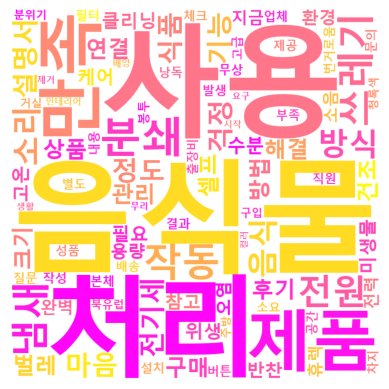

In [23]:
plt.imshow(wc)
plt.axis('off')
plt.show()